## First, import the libraries we will use

In [43]:
%matplotlib inline

import numpy as np
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Open the GOES-17 NetCDF File
Using xarray, I assign the opened file to the variable C for the CONUS domain.

In [44]:
#GOES 16 all in one file
#FILE = 'OR_ABI-L2-MCMIPC-M3_G16_s20190422102136_e20190422104509_c20190422105021.nc'

#GOES 17 on Amazon, each channel in a different file
FILE_5 ='OR_ABI-L2-CMIPC-M3C05_G17_s20190422102163_e20190422104536_c20190422105008.nc'
FILE_3 = 'OR_ABI-L2-CMIPC-M3C03_G17_s20190422102163_e20190422104536_c20190422104597.nc'
FILE_3 = 'OR_ABI-L2-CMIPM1-M3C03_G17_s20190461730268_e20190461730326_c20190461730375.nc'
File_5 = 'OR_ABI-L2-CMIPM1-M3C05_G17_s20190461730268_e20190461730326_c20190461730375.nc'
FILE_3 = 'OR_ABI-L2-CMIPC-M3C03_G17_s20190461732189_e20190461734562_c20190461735029.nc'
FILE_5 = 'OR_ABI-L2-CMIPC-M3C05_G17_s20190461732189_e20190461734562_c20190461735030.nc'
FILE_3 = 'OR_ABI-L2-CMIPM1-M3C03_G17_s20190461700268_e20190461700326_c20190461700370.nc'
FILE_5 = 'OR_ABI-L2-CMIPM1-M3C05_G17_s20190461700268_e20190461700326_c20190461700373.nc'
FILE_3 = 'OR_ABI-L2-CMIPC-M3C03_G17_s20190741802189_e20190741804562_c20190741805023.nc'
FILE_5 = 'OR_ABI-L2-CMIPC-M3C05_G17_s20190741802189_e20190741804562_c20190741805035.nc'
FILE_3 = 'OR_ABI-L2-CMIPC-M3C03_G17_s20190742102189_e20190742104562_c20190742105016.nc'
FILE_5 = 'OR_ABI-L2-CMIPC-M3C05_G17_s20190742102189_e20190742104562_c20190742105023.nc'
FILE_3 = 'OR_ABI-L2-CMIPC-M3C03_G17_s20190752002189_e20190752004562_c20190752005027.nc'
FILE_5 = 'OR_ABI-L2-CMIPC-M3C05_G17_s20190752002189_e20190752004562_c20190752005028.nc'
FILE_2 = 'OR_ABI-L2-CMIPC-M3C02_G17_s20190752002189_e20190752004562_c20190752005057.nc'

FILE_3_16 = 'OR_ABI-L2-CMIPC-M3C03_G16_s20190752002189_e20190752004562_c20190752005035.nc'
FILE_5_16 = 'OR_ABI-L2-CMIPC-M3C05_G16_s20190752002189_e20190752004562_c20190752005036.nc'

# goes 17
C_5 = xarray.open_dataset(FILE_5)
C_3 = xarray.open_dataset(FILE_3)
#channel 2 at finer spatial res
#C_2 = xarray.open_dataset(FILE_2)

# goes 16
C_5_16 = xarray.open_dataset(FILE_5_16)
C_3_16 = xarray.open_dataset(FILE_3_16)

## Date and Time Information
Each file represents the data collected during one scan sequence for the domain. There are several different time stamps in this file, which are also found in the file's name.

In [45]:
#goes 16
# Scan's start time, converted to datetime object
scan_start_16 = datetime.strptime(C_5_16.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end_16 = datetime.strptime(C_5_16.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created_16 = datetime.strptime(C_5_16.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
# I'm not a fan of numpy datetime, so I convert it to a regular datetime object
midpoint_16 = str(C_5_16['t'].data)[:-8]
scan_mid_16 = datetime.strptime(midpoint_16, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : %s' % scan_start_16)
print('Scan midpoint : %s' % scan_mid_16)
print('Scan End      : %s' % scan_end_16)
print('File Created  : %s' % file_created_16)
print('Scan Duration GOES 16: %.2f minutes' % ((scan_end_16-scan_start_16).seconds/60))

Scan Start    : 2019-03-16 20:02:18.900000
Scan midpoint : 2019-03-16 20:03:37.500000
Scan End      : 2019-03-16 20:04:56.200000
File Created  : 2019-03-16 20:05:03.600000
Scan Duration GOES 16: 2.62 minutes


In [46]:
#goes 17
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(C_5.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

# Scan's end time, converted to datetime object
scan_end = datetime.strptime(C_5.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(C_5.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
# I'm not a fan of numpy datetime, so I convert it to a regular datetime object
midpoint = str(C_5['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : %s' % scan_start)
print('Scan midpoint : %s' % scan_mid)
print('Scan End      : %s' % scan_end)
print('File Created  : %s' % file_created)
print('Scan Duration : %.2f minutes' % ((scan_end-scan_start).seconds/60))

Scan Start    : 2019-03-16 20:02:18.900000
Scan midpoint : 2019-03-16 20:03:37.600000
Scan End      : 2019-03-16 20:04:56.200000
File Created  : 2019-03-16 20:05:02.800000
Scan Duration : 2.62 minutes


In [47]:
# Confirm that each band is the wavelength we are interested in
#for band in [ 3, 5]:
#    print("%s is %.2f %s" % (C['band_wavelength_C%02d' % band].long_name,
#                             C['band_wavelength_C%02d' % band][0],
#                             C['band_wavelength_C%02d' % band].units))

In [48]:
# Load the two channels into appropriate G and NIR variables

#goes 17
NIR = C_5['CMI'].data
G = C_3['CMI'].data
#R = C_2['CMI'].data

#do the same for GOES 16
NIR_16 = C_5_16['CMI'].data
G_16 = C_3_16['CMI'].data



In [49]:
# values must be between 0 and 1.
NIR = np.clip(NIR, 0, 1)
G = np.clip(G, 0, 1)

# values must be between 0 and 1.
NIR_16 = np.clip(NIR_16, 0, 1)
G_16 = np.clip(G_16, 0, 1)



## Simple Image
Use `plt.imshow` to get a quick look at the channels and RGB composite we created.

First, we plot each channel individually. The deeper the color means the satellite is observing more light in that channel. Clouds appear white becuase they reflect lots of red, green, and blue light. You will also notice that the land reflects a lot of "green" in the veggie channel becuase this channel is sensitive to the chlorophyll.

fig, ([ax1, ax2]) = plt.subplots(1, 2, figsize=(16,3))

ax1.imshow(NIR, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('NIR', fontweight='semibold')
ax1.axis('off');

ax2.imshow(G, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Green', fontweight='semibold')
ax2.axis('off');

plt.subplots_adjust(wspace=.02)

fig, ([ax1, ax2]) = plt.subplots(1, 2, figsize=(16,3))

ax1.imshow(NIR_16, cmap='Reds', vmax=1, vmin=0)
ax1.set_title('NIR', fontweight='semibold')
ax1.axis('off');

ax2.imshow(G_16, cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Green', fontweight='semibold')
ax2.axis('off');

plt.subplots_adjust(wspace=.02)

In [50]:
#goes 17 info
C_5['goes_imager_projection']

<xarray.DataArray 'goes_imager_projection' ()>
array(-2147483647)
Coordinates:
    t        datetime64[ns] 2019-03-16T20:03:37.624284928
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:                       GOES-R ABI fixed grid projection
    grid_mapping_name:               geostationary
    perspective_point_height:        35786023.0
    semi_major_axis:                 6378137.0
    semi_minor_axis:                 6356752.31414
    inverse_flattening:              298.2572221
    latitude_of_projection_origin:   0.0
    longitude_of_projection_origin:  -137.0
    sweep_angle_axis:                x

In [51]:
#goes 16 info
C_5_16['goes_imager_projection']

<xarray.DataArray 'goes_imager_projection' ()>
array(-2147483647)
Coordinates:
    t        datetime64[ns] 2019-03-16T20:03:37.591216
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:                       GOES-R ABI fixed grid projection
    grid_mapping_name:               geostationary
    perspective_point_height:        35786023.0
    semi_major_axis:                 6378137.0
    semi_minor_axis:                 6356752.31414
    inverse_flattening:              298.2572221
    latitude_of_projection_origin:   0.0
    longitude_of_projection_origin:  -75.0
    sweep_angle_axis:                x

In [52]:
# Satellite height goes 17
sat_h = C_5['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = C_5['goes_imager_projection'].longitude_of_projection_origin
#uncertainty whether at -137.2. -137 seems correct now
sat_lon = -137

# Satellite sweep
sat_sweep = C_5['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals the scanning angle (in radians) multiplied by the satellite height
# See details here: https://proj4.org/operations/projections/geos.html?highlight=geostationary
x = C_5['x'][:] * sat_h
y = C_5['y'][:] * sat_h

In [53]:
# Satellite height goes 16
sat_h_16 = C_5_16['goes_imager_projection'].perspective_point_height

# Satellite longitude
#sat_lon = C_5['goes_imager_projection'].longitude_of_projection_origin
#uncertainty whether at -75.2; -75 seems correct now
sat_lon_16 = -75

# Satellite sweep
sat_sweep_16 = C_5_16['goes_imager_projection'].sweep_angle_axis

# The projection x and y coordinates equals the scanning angle (in radians) multiplied by the satellite height
# See details here: https://proj4.org/operations/projections/geos.html?highlight=geostationary
x_16 = C_5_16['x'][:] * sat_h_16
y_16 = C_5_16['y'][:] * sat_h_16

In [54]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

projection = ccrs.Geostationary(central_longitude=sat_lon, satellite_height=sat_h,
                               sweep_axis=sat_sweep)
img_extent = (x.min(), x.max(), y.min(), y.max())

projection_16 = ccrs.Geostationary(central_longitude=sat_lon_16, satellite_height=sat_h_16,
                               sweep_axis=sat_sweep_16)
img_extent_16 = (x_16.min(), x_16.max(), y_16.min(), y_16.max())




#### The magic function: `pyproj.Proj`
This function creates a map projection object of the geostationary projection.

In [55]:
# Create a pyproj geostationary map object
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)

# Create a pyproj geostationary map object
p_16 = Proj(proj='geos', h=sat_h_16, lon_0=sat_lon_16, sweep=sat_sweep_16)
# Perform cartographic transformation for goes 17. That is, convert image projection coordinates (x and y)
# to latitude and longitude values.
XX, YY = np.meshgrid(x, y)
lons, lats = p(XX, YY, inverse=True)

# Create a pyproj geostationary map object
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)

print('GOES 17 dimensions: %s %s' % np.shape(lons))

# Perform cartographic transformation for goes 16. That is, convert image projection coordinates (x and y)
# to latitude and longitude values.
XX_16, YY_16 = np.meshgrid(x_16, y_16)
lons_16, lats_16 = p_16(XX_16, YY_16, inverse=True)

# Create a pyproj geostationary map object
p_16 = Proj(proj='geos', h=sat_h_16, lon_0=sat_lon_16, sweep=sat_sweep_16)

print('GOES 16 dimensions: %s %s' % np.shape(lons_16))
#print (lons_16,lats_16)


GOES 17 dimensions: 3000 5000
GOES 16 dimensions: 3000 5000


In [56]:
# values should be between -1 and 1
#goes 17
NDWI = (G-NIR)/(G+NIR+.0001)
min_ndwi = np.nanmin(NDWI)
max_ndwi = np.nanmax(NDWI)


#set positive values (water to 1)
NDWI[(NDWI>0.)]=1.
#set negative values ("land" to 0.15)
NDWI[(NDWI<0.)]=.15
#screen out snow
NDWI[(G > 0.13)]=0.15

NDWI_16 = (G_16-NIR_16)/(G_16+NIR_16+.0001)
#set positive values (water to 1)
NDWI_16[(NDWI_16>0.)]=1.
#set negative values ("land" to 0.15)
NDWI_16[(NDWI_16<0.)]=.15
#screen out snow
NDWI_16[(G_16 > 0.13)]=0.15


C:\Users\johnh\Anaconda3\envs\pyBKB_v3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\johnh\Anaconda3\envs\pyBKB_v3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\johnh\Anaconda3\envs\pyBKB_v3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


In [57]:
lons_i = np.arange(-122.5, -111., 0.01)
lats_i = np.arange(35.5, 43., 0.01)
xx_i, yy_i = np.meshgrid(lons_i,lats_i)
dims_i = np.shape(xx_i)
iy = len(lats_i)
ix = len(lons_i)

NDWI_I = np.ones((iy,ix))
NDWI_I= NDWI_I.flatten()
NDWI_I_16 = np.ones((iy,ix))
NDWI_I_16= NDWI_I_16.flatten()

NDWI_M = np.ones((iy,ix))


In [58]:
index=np.load('proj_west_17.npy')
NDWI=NDWI.flatten()
print(np.shape(NDWI))
print(index)
print(len(index))
for i in range(0,len(index)):
    idx = index[i]
    NDWI_I[i] = NDWI[idx]
print(NDWI_I)
NDWI_I=np.reshape(NDWI_I,(iy,ix))
print(np.shape(NDWI_I))

(15000000,)
[5243745 5248746 5243746 ... 2634410 2639411 2639412]
862500
[1.         1.         1.         ... 0.15000001 0.15000001 0.15000001]
(750, 1150)


In [59]:
index_16=np.load('proj_west_16.npy')
#for NDWI_16 need to truncate data to part where the lat/lons defined
NDWI_16t=NDWI_16[575:,:]
NDWI_16t=NDWI_16t.flatten()
print()
print(index_16)
print(len(index_16))
for i in range(0,len(index_16)):
    idx = index_16[i]
    NDWI_I_16[i] = NDWI_16t[idx]

print(NDWI_I_16)
NDWI_I_16=np.reshape(NDWI_I_16,(iy,ix))
print(np.shape(NDWI_I_16))
NDWI_I_M = np.maximum(NDWI_I,NDWI_I_16)
print(NDWI_I_M)


[3060105 3055106 3055107 ...    1080    1080    1081]
862500
[1.         1.         1.         ... 0.15000001 0.15000001 0.15000001]
(750, 1150)
[[1.         1.         1.         ... 0.15000001 0.15000001 0.15000001]
 [1.         1.         1.         ... 0.15000001 0.15000001 0.15000001]
 [1.         1.         1.         ... 0.15000001 0.15000001 0.15000001]
 ...
 [0.15000001 0.15000001 0.15000001 ... 0.15000001 0.15000001 0.15000001]
 [0.15000001 0.15000001 0.15000001 ... 0.15000001 0.15000001 0.15000001]
 [0.15000001 0.15000001 0.15000001 ... 0.15000001 0.15000001 0.15000001]]


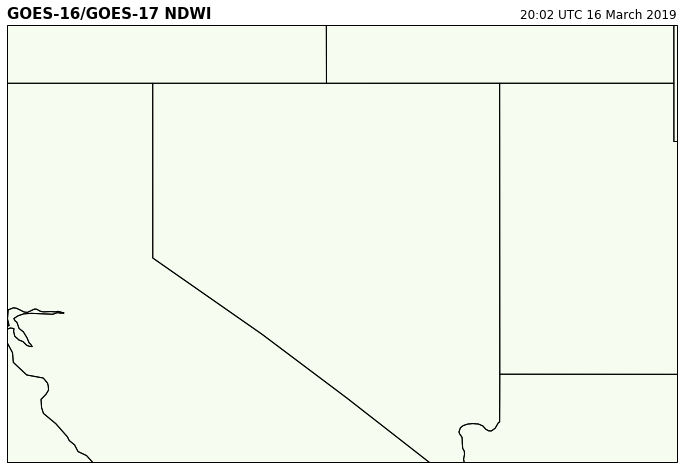

In [60]:
# Now we can plot the GOES data on a zoomed in map centered over west.
plt.figure(figsize=[12,12])
l = {'latitude': 40.5,
     'longitude': -118.}
cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))
lc = ccrs.PlateCarree()
ax = plt.axes(projection=lc)
ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+2.5], crs=lc)
newmap = ax.pcolormesh(lons_i, lats_i, NDWI_M, cmap=cmap, linewidth=0, transform=lc)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-16/GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('wus_water_march16_2002_goes_16_17.png')

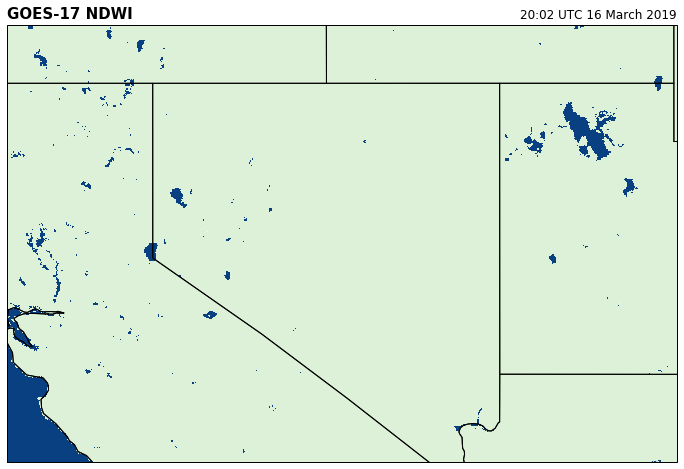

In [61]:
# Now we can plot the GOES data on a zoomed in map centered over west.
plt.figure(figsize=[12,12])
l = {'latitude': 40.5,
     'longitude': -118.}
cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))
lc = ccrs.PlateCarree()
ax = plt.axes(projection=lc)
ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+2.5], crs=lc)
newmap = ax.pcolormesh(lons_i, lats_i, NDWI_I, cmap=cmap, linewidth=0, transform=lc)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('wus_water_march16_2002_goes_17.png')

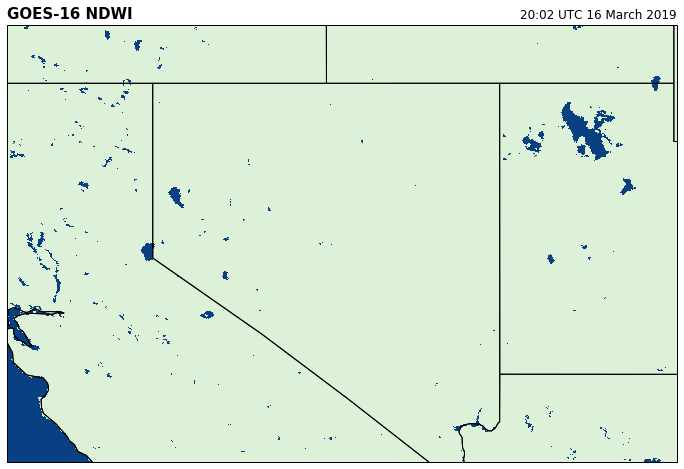

In [62]:
# Now we can plot the GOES data on a zoomed in map centered over west.
plt.figure(figsize=[12,12])
l = {'latitude': 40.5,
     'longitude': -118.}
cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))
lc = ccrs.PlateCarree()
ax = plt.axes(projection=lc)
ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+2.5], crs=lc)
newmap = ax.pcolormesh(lons_i, lats_i, NDWI_I_16, cmap=cmap, linewidth=0, transform=lc)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-16 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('wus_water_march16_2002_goes_16.png')

plt.figure(1, figsize=[15, 12])
ax = plt.axes(projection=projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
cmap = plt.get_cmap('GnBu')
ax.imshow(NDWI, origin='upper', cmap=cmap,extent=img_extent)
plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=16)
plt.title('%s' % scan_start.strftime('%d %B %Y %H:%M UTC '), loc='right');

plt.figure(1, figsize=[15, 12])
ax = plt.axes(projection=projection_16)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
cmap = plt.get_cmap('GnBu')
ax.imshow(NDWI_16, origin='upper', cmap=cmap,extent=img_extent_16)

plt.title('GOES-16 NDWI', loc='left', fontweight='semibold', fontsize=16)
plt.title('%s' % scan_start_16.strftime('%d %B %Y %H:%M UTC '), loc='right');

# Location of Utah

######################################################################
# Using other projections
# ----------------------------------------------
#
# Changing the projections with cartopy is straightforward. Here we use
# the Lambert Conformal projection to display the GOES-16 data.

fig = plt.figure(figsize=(15, 12))
l = {'latitude': 40.,
     'longitude': -113.}

semi_major = C_5['goes_imager_projection'].semi_major_axis
semi_minor = C_5['goes_imager_projection'].semi_minor_axis
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
geos = ccrs.Geostationary(central_longitude=sat_lon, 
                         satellite_height=sat_h, globe=globe)

cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))

lc = ccrs.Orthographic(central_longitude=-115,central_latitude=40)

ax = fig.add_subplot(1, 1, 1, projection=lc)
ax.set_extent([l['longitude']-1.5, l['longitude']+1.5, l['latitude']-1.25, l['latitude']+1.5], crs=ccrs.PlateCarree())

ax.imshow(np.flipud(NDWI), origin='lower',
                   extent=(x.min(), x.max(), y.min(), y.max()),
                   transform=geos,
                   interpolation='none',cmap=cmap)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'))


plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');




ValueError: not enough values to unpack (expected 2, got 1)

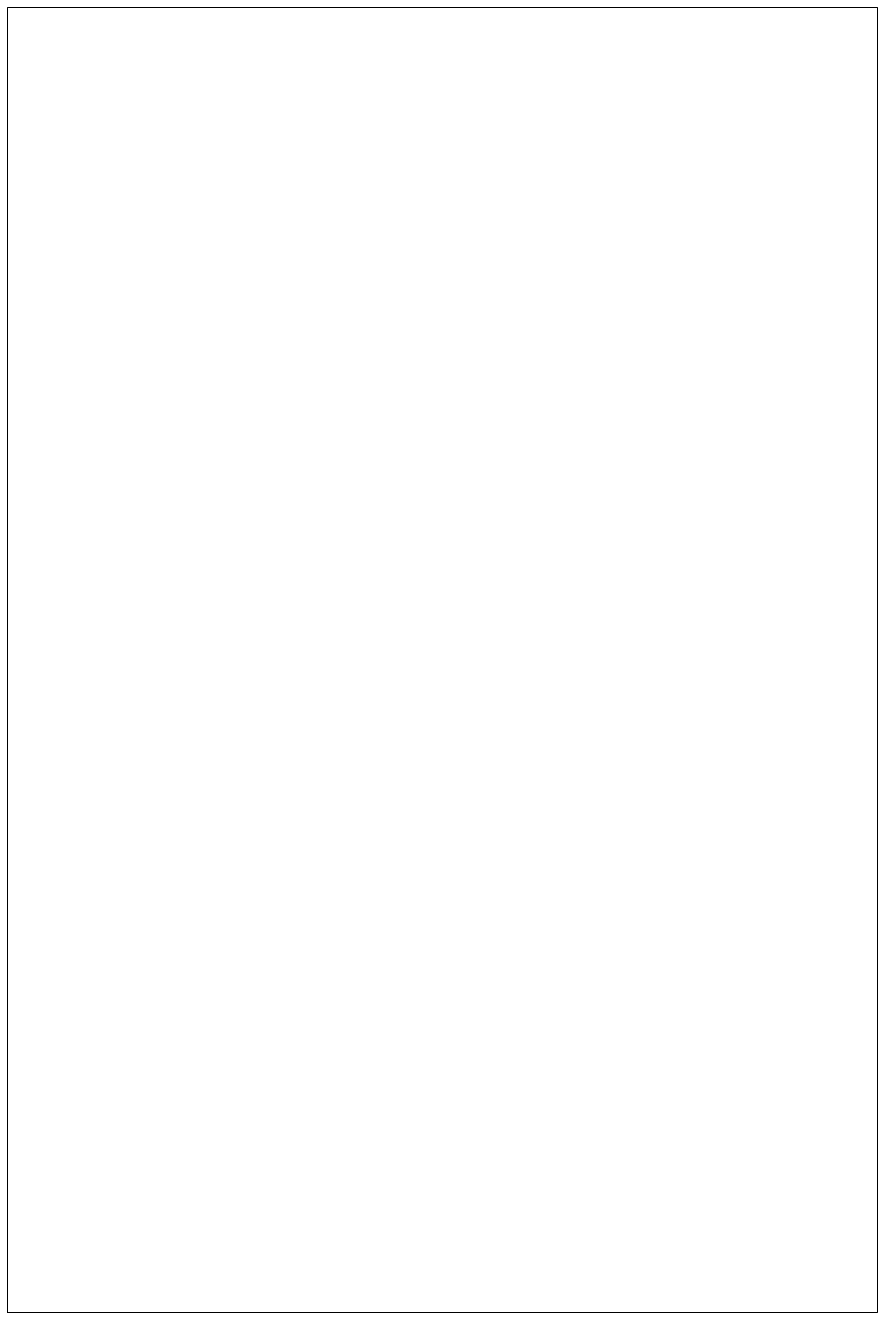

In [63]:

# Location of Utah
l = {'latitude': 40.5,
     'longitude': -113.}

projection = ccrs.PlateCarree()

# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[24,24])

cmap = plt.get_cmap('GnBu')


ax = plt.axes(projection=projection)
ax.set_extent([l['longitude']-1.25, l['longitude']+1.25, l['latitude']-2.25, l['latitude']+1.5], crs=projection)
newmap = ax.pcolormesh(lons, lats, NDWI, cmap=cmap, linewidth=0, transform=projection)



#plt.colorbar(newmap, ax=ax)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('nutah_water_march16_2002.png')

In [ ]:

# Location of Utah
l = {'latitude': 40.5,
     'longitude': -113.}

projection_16 = ccrs.PlateCarree()

# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[24,24])

cmap = plt.get_cmap('GnBu')


ax = plt.axes(projection=projection_16)
ax.set_extent([l['longitude']-1.25, l['longitude']+1.25, l['latitude']-2.25, l['latitude']+1.5], crs=projection_16)
newmap_16 = ax.pcolormesh(lons_16, lats_16, NDWI_16, cmap=cmap, linewidth=0, transform=projection_16)



#plt.colorbar(newmap, ax=ax)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-16 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start_16.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('nutah_water_march16_2002_16.png')

In [ ]:
# Location of Utah
l = {'latitude': 39.75,
     'longitude': -111.5}

# Draw zoomed map
mZ = Basemap(resolution='i', projection='cyl', area_thresh=50000,\
             llcrnrlon=l['longitude']-3.25, llcrnrlat=l['latitude']-3.25,\
             urcrnrlon=l['longitude']+3.25, urcrnrlat=l['latitude']+3.25,)
# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[12, 12])

cmap = plt.get_cmap('GnBu')
newmap = mZ.pcolormesh(lons, lats, NDWI, cmap=cmap, linewidth=0, latlon=True)
#plt.colorbar(newmap)

mZ.drawcoastlines()
mZ.drawcountries()
mZ.drawstates()

plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('utah_water_march16_2002.png')

In [ ]:

# Location of western US
l = {'latitude': 40.5,
     'longitude': -118.}

projection = ccrs.PlateCarree()

# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[24,24])

cmap = plt.get_cmap('GnBu')

ax = plt.axes(projection=projection)
ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+3], crs=projection)
newmap = ax.pcolormesh(lons, lats, NDWI, cmap=cmap, linewidth=0, transform=projection)


#plt.colorbar(newmap, ax=ax)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('wus_water_march16_2002.png')

In [ ]:
 
######################################################################
# Using other projections
# ----------------------------------------------
#
# Changing the projections with cartopy is straightforward. Here we use
# the Lambert Conformal projection to display the GOES-16 data.

# Location of western US
l = {'latitude': 40,
     'longitude': -118.}

fig = plt.figure(figsize=(15, 12))


semi_major = C_5['goes_imager_projection'].semi_major_axis
semi_minor = C_5['goes_imager_projection'].semi_minor_axis
globe = ccrs.Globe(semimajor_axis=semi_major, semiminor_axis=semi_minor)
geos = ccrs.Geostationary(central_longitude=sat_lon, 
                         satellite_height=sat_h, globe=globe)

cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))

lc = ccrs.Orthographic(central_longitude=-118,central_latitude=40)

ax = fig.add_subplot(1, 1, 1, projection=lc)
ax.set_extent([l['longitude']-5, l['longitude']+7, l['latitude']-5, l['latitude']+5], crs=ccrs.PlateCarree())

ax.imshow(np.flipud(NDWI), origin='lower',
                   extent=(x.min(), x.max(), y.min(), y.max()),
                   transform=geos,
                   interpolation='none',cmap=cmap)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'))


plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');


In [ ]:
# Location of western US
l = {'latitude': 40.5,
     'longitude': -118.}

projection_16 = ccrs.PlateCarree()

# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[24,24])

cmap = plt.get_cmap('GnBu')

ax = plt.axes(projection=projection_16)
ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+3], crs=projection_16)
newmap = ax.pcolormesh(lons, lats, NDWI, cmap=cmap, linewidth=0, transform=projection_16)


#plt.colorbar(newmap, ax=ax)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-16 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
plt.savefig('wus_water_march16_2002_16.png')

In [ ]:

#ax.scatter(lon, lat, transform=ccrs.Geodetic())
# Location of western US
#l = {'latitude': 40.5,
#     'longitude': -118.}

#projection = ccrs.AzimuthalEquidistant(central_longitude=-118., central_latitude=40.5)

# Now we can plot the GOES data on a zoomed in map centered over Utah.
#plt.figure(figsize=[24,24])

#cmap = plt.get_cmap('BrBG')

#ax = plt.axes(projection=projection)
#ax.set_extent([l['longitude']-4.5, l['longitude']+7, l['latitude']-5, l['latitude']+3], crs=ccrs.Geodetic())
#newmap = ax.pcolormesh(lons, lats, NDWI, cmap=cmap, linewidth=0, transform=ccrs.Geodetic())


#plt.colorbar(newmap, ax=ax)

#ax.add_feature(cfeature.COASTLINE.with_scale('50m'),transform=projection)
#ax.add_feature(cfeature.STATES.with_scale('50m'))

#plt.title('GOES-17 NDWI', loc='left', fontweight='semibold', fontsize=15);
#plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');

In [ ]:
lons_i = np.arange(-114, -110, 0.25)
lats_i = np.arange(39, 41, 0.25)
xx_i, yy_i = np.meshgrid(lons_i,lats_i)
dims_i = np.shape(xx_i)
iy = len(lats_i)
ix = len(lons_i)
NDWI_I = np.ones((iy,ix))
print(np.shape(NDWI_I))

l = {'latitude': 40.,
     'longitude': -112.}

# Now we can plot the GOES data on a zoomed in map centered over Utah.
plt.figure(figsize=[12,12])

cmap = plt.get_cmap('GnBu')

#lc = ccrs.LambertConformal(central_longitude=-113,standard_parallels=(38.5,38.5))
lc = ccrs.PlateCarree()
ax = plt.axes(projection=lc)
ax.set_extent([l['longitude']-2, l['longitude']+2, l['latitude']-2, l['latitude']+2], crs=lc)
newmap = ax.pcolormesh(lons_i, lats_i, NDWI_I, cmap=cmap, linewidth=0, transform=lc)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

plt.title('GOES-16 NDWI', loc='left', fontweight='semibold', fontsize=15);
plt.title('%s' % scan_start.strftime('%H:%M UTC %d %B %Y'), loc='right');
